# Assignment 1 Machine Learning
Submitted by : Purushottam Padhya (S3847501)

# Introduction

This is an assignment which is based on the data set of Hospital and our goal is to predict the minimum number of days to stay in hospital using different Machine Learning techniques.

# Objective
Our goal is to predict the Length of stay for patient in hospital based on the given attributes on the provided datasets using different Machine learning techniques.
Target Varibale = LengthOfStay

# Dataset
In this Machine Learning process, I am using Patient's Dataset from Hospital. We are going to analyse the patients data set and have to predict the number of days patient's have to stay in a hospital based on given saveral features.





# Load dataset and Preprocess the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
health_data_frame = pd.read_csv('train_data.csv')
health_data_frame_test = pd.read_csv('test_data.csv')
health_data_frame.head()


ID HealthServiceArea Gender                    Race TypeOfAdmission  \
0   1     New York City      F              Other Race         Newborn   
1   2     New York City      M  Black/African American         Newborn   
2   3     New York City      M              Other Race         Newborn   
3   4     New York City      F              Other Race         Newborn   
4   5     New York City      F              Other Race         Newborn   

   CCSProcedureCode  APRSeverityOfIllnessCode           PaymentTypology  \
0               228                         1                  Medicaid   
1               228                         1                  Medicaid   
2               220                         1  Private Health Insurance   
3                 0                         1  Private Health Insurance   
4               228                         1                  Medicaid   

   BirthWeight EmergencyDepartmentIndicator  AverageCostInCounty  \
0         3700                            N                 2611   
1         2900                            N                 3242   
2         3200                            N                 3155   
3         3300                            N                 3155   
4         2600                            N                 2611   

   AverageChargesInCounty  AverageCostInFacility  AverageChargesInFacility  \
0                    9227                   1751                      8951   
1                    8966                   3338                      6409   
2                   11381                   4980                      9323   
3                   11381                   5826                     15680   
4                    9227                   6000                     14344   

   AverageIncomeInZipCode  LengthOfStay  
0                      45             1  
1                      34             1  
2                      45             1  
3                      59             1  
4                      59             1

# Exploratory data analysis (EDA)

This is a first steps of Machine learning process before selecting any model for prediction. EDA refers the mojor crical process of Machine learning so it would optimize the given set by extracting important information, removing outliers, removing underlying assumption for test and determine the  optimal factor of settings and helps to choose the best model to predict the value with the help of different graphical visualization. 

Finding different statistical values and plotting those values on the graphical form will shows how data is distributed using mean, median and standard deviation of the datasets.
The state of the plot can help to maximize the pattern recognization of the data sets.
> EDA provide the distribution of data set help to familarise with the different attributes

Checking the size of the dataset

In [3]:
health_data_frame.shape

(59966, 16)

This shows the number of rows and columns in the given data set

Let's see the features and corresponding data types, also it shows if any values are null or not

In [4]:
health_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

Now visualize the summary of the given train data set and can look how data are distributed shortly.

In [5]:
health_data_frame.describe()

ID  CCSProcedureCode  APRSeverityOfIllnessCode   BirthWeight  \
count  59966.000000      59966.000000              59966.000000  59966.000000   
mean   29983.500000        155.404229                  1.254594   3336.298903   
std    17310.837458         89.541978                  0.546207    446.244475   
min        1.000000         -1.000000                  1.000000   2500.000000   
25%    14992.250000        115.000000                  1.000000   3000.000000   
50%    29983.500000        220.000000                  1.000000   3300.000000   
75%    44974.750000        228.000000                  1.000000   3600.000000   
max    59966.000000        231.000000                  4.000000   7500.000000   

       AverageCostInCounty  AverageChargesInCounty  AverageCostInFacility  \
count         59966.000000            59966.000000           59966.000000   
mean           2372.806690             7979.126922            2396.414318   
std             639.755096             3220.291347            1248.501189   
min             712.000000             1243.000000             457.000000   
25%            2041.000000             4620.000000            1551.000000   
50%            2533.000000             9227.000000            1967.000000   
75%            2785.000000            10644.000000            2895.000000   
max            3242.000000            11381.000000            8114.000000   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
count              59966.000000            59966.000000  59966.000000  
mean                7958.472668               59.811143      2.538405  
std                 3859.294711               21.470170      1.171246  
min                 1120.000000               28.000000      1.000000  
25%                 4438.000000               45.000000      2.000000  
50%                 7945.000000               55.000000      2.000000  
75%                11619.000000               74.000000      3.000000  
max                18466.000000              115.000000     10.000000

From the above dataframe, we can see that there are categorical and numerical values.
Numerical datas are those datas which represents the numerical values, for eg., BirthWeight, AverageChargesInCounty
Categorical datas are the values which does not give numerical interpretation, for eg., Gender, Race, Payment Topology


> According to our testing assumption we have to drop the following columns , ID and HealthServiceArea, These attributes does not affect the our predicted results , so we are droping those attributes from our prediction.

In [6]:

health_data_frame = health_data_frame.drop(columns = ['ID','HealthServiceArea'])

health_data_frame_test = health_data_frame_test.drop(columns = ['ID','HealthServiceArea'])

As our assignment specification,our target columns should comprises there would be two types of classes for the attributes LengthOfStay. 
One class 0 for the LengthOfStay less than 4 and 1 for the LengthOfStay equal to 4 and more than 4.
Here is the code that convert our training set attributes of LengthOfStay in two classes either 0(LengthOfStay < 4) and 1(LengthOfStay >=4).

In [7]:
health_data_frame['LengthOfStay'] = health_data_frame['LengthOfStay'].apply(lambda x: 0 if x < 4 else 1)
health_data_frame['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

# Visualization

Plotting a data of length of stay distribution on the train data set

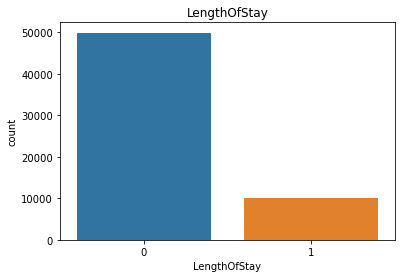

In [8]:
import seaborn as sns
plot = plt.subplots(figsize=(6,4))
sns.countplot(x='LengthOfStay', data=health_data_frame)
plt.title("LengthOfStay")
plt.show()

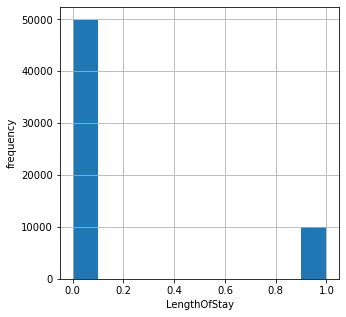

In [9]:

health_data_frame['LengthOfStay'].hist(figsize=(5,5))
plt.xlabel('LengthOfStay')
plt.ylabel('frequency')
plt.show()



# Relationship between variable

In last visualization I have done some indivisual data distribution of the given datasets. Now let's see the relationship between the multiple varibale and find how multiple varibale relate each other and find out there distributon between multiple varibale. The scatter plot Sometimes it is also useful to observe the relationship between two variables. There are several techniques that we can use for this purpose. One of the key techniques is a scatter plot. 

Since our task is to predict MEDV (target variable) using all other attributes, let's plot the relationship between MEDV and other columns.

For this we can use matplotlib. However there is another python package called seaborn that plots nice looking figures. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. You can learn more about seaborn at [seaborn: statistical data visualization](https://seaborn.pydata.org/) 

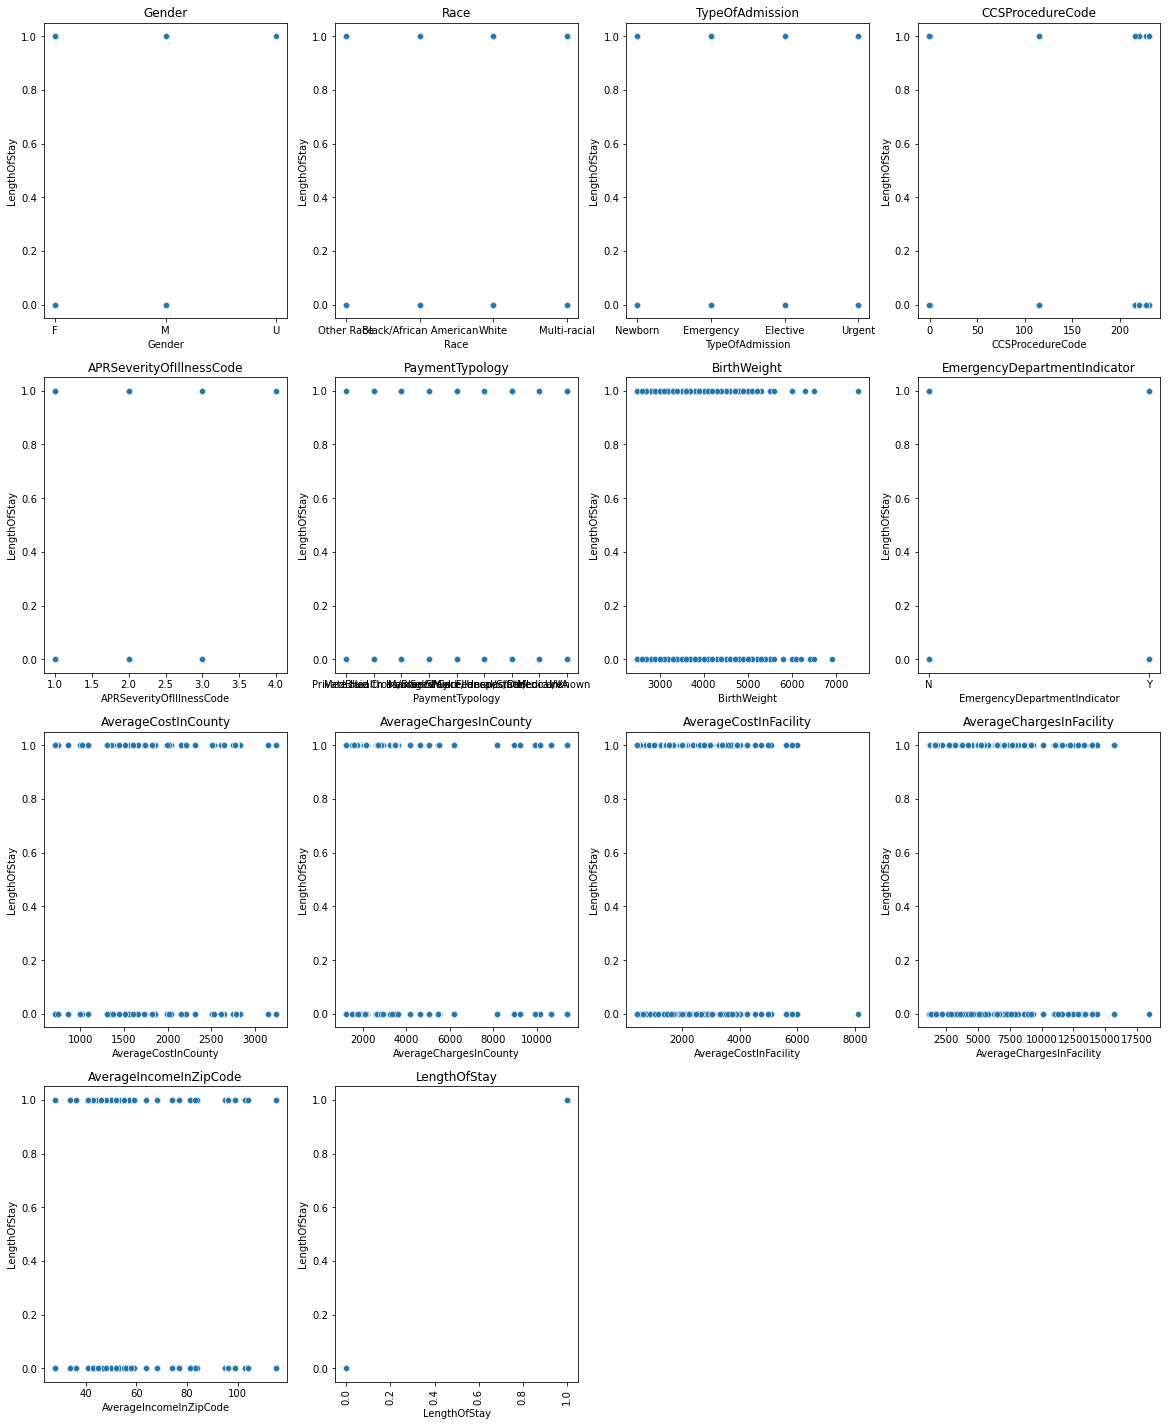

In [10]:
import seaborn as sns
plt.figure(figsize=(20,25))
for i, col in enumerate(health_data_frame.columns):
    plt.subplot(4,4,i+1)
    sns.scatterplot(data=health_data_frame, x=col, y='LengthOfStay')
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()


The above scattered plot shows that the averageCostinCountry and length of stay are directly related shows good relation between them.
The relationship between LengthOfStay with many of the factors are too scattered and deviate from the mean value.(ex. types of admission, CCSProcedurecCode )
Let's find out the relationship between the two different variables.

Finding  the relationship between the two different variables.

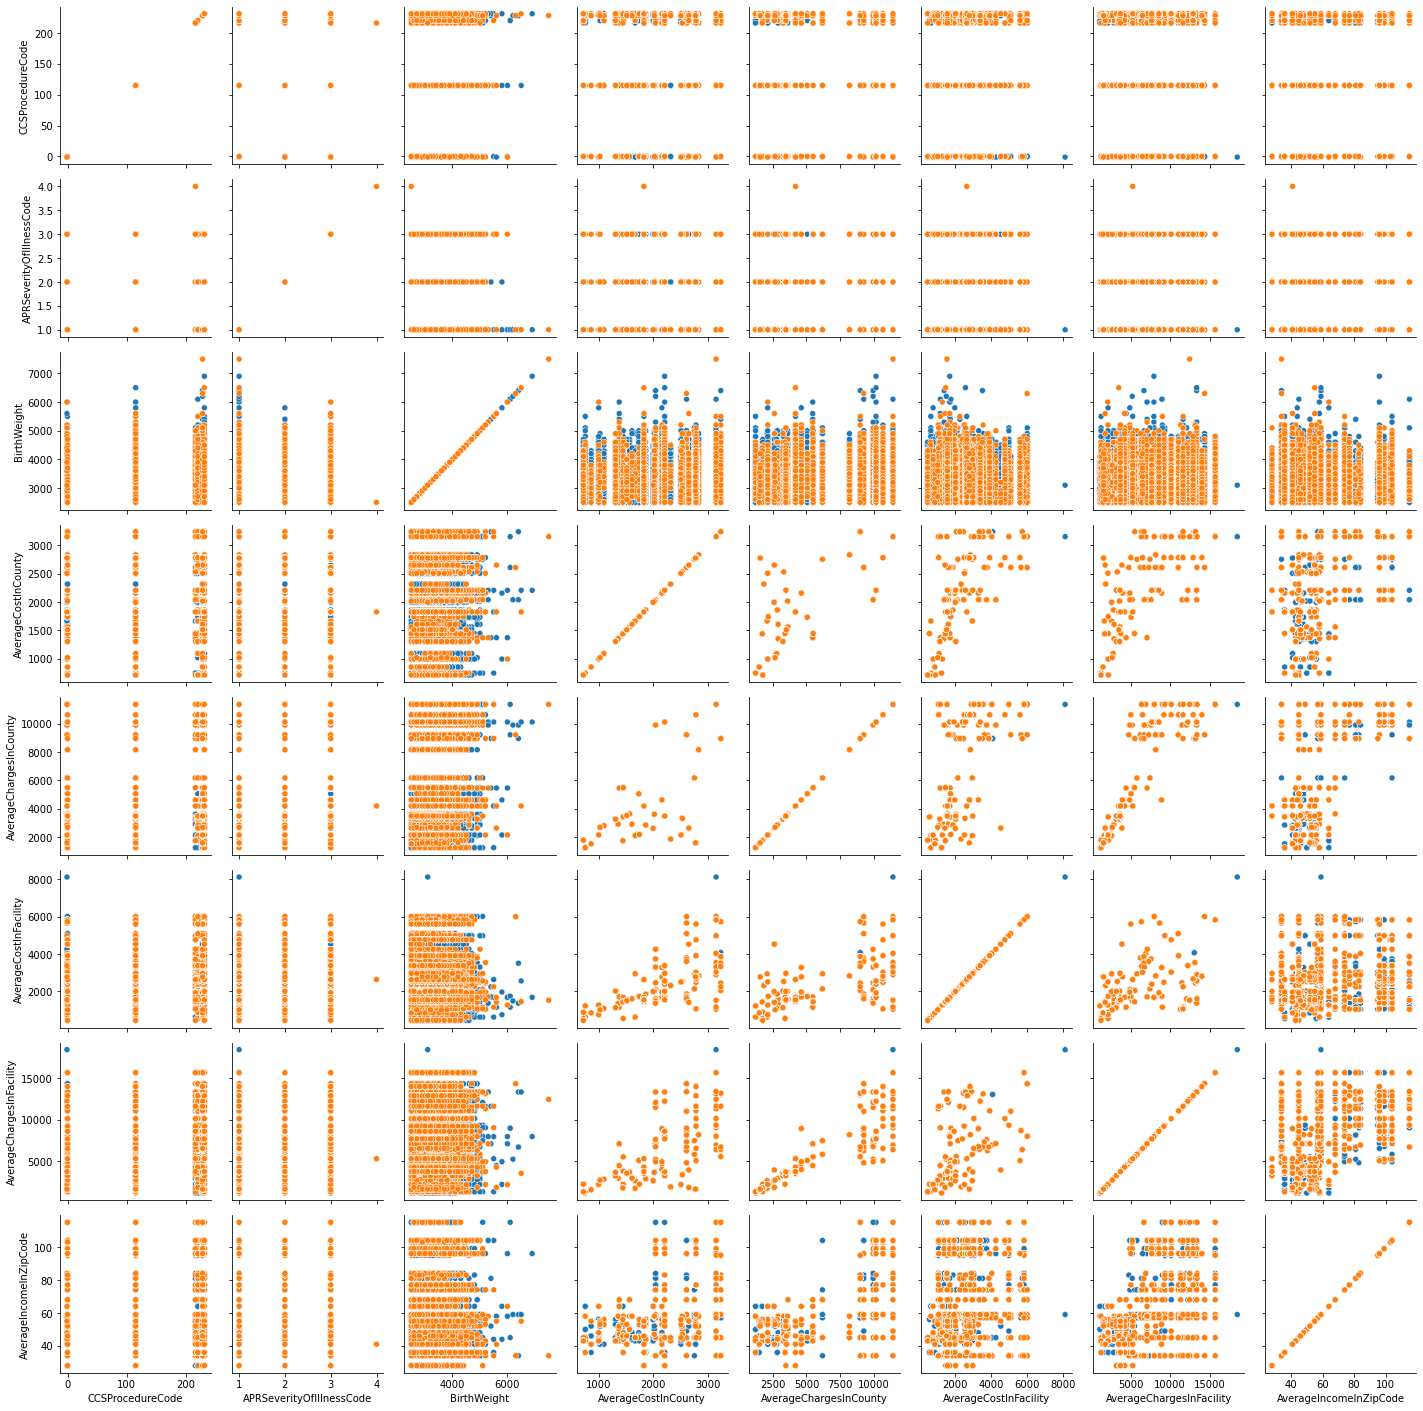

In [11]:
import seaborn as sns

g = sns.PairGrid(health_data_frame, vars=['CCSProcedureCode','APRSeverityOfIllnessCode' ,'BirthWeight', 'AverageCostInCounty' , 'AverageChargesInCounty', 
                             'AverageCostInFacility', 'AverageChargesInFacility', 'AverageIncomeInZipCode'], hue="LengthOfStay")
g.map(sns.scatterplot)
plt.show()

From the above graph plot between two variable still could not find the significant linear relationship between two variables with LengthOfStay.
Let's try with the different plot.

Corelation is the another important statistics when developing ML Model. Lets plot the co-relation matrix for the numerical data we have 



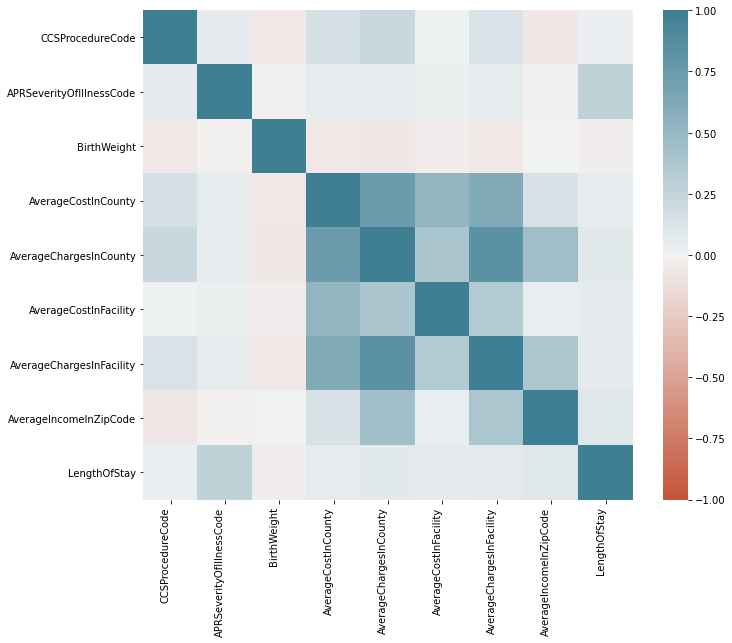

In [12]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 9))
corr = health_data_frame.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<span style="font-size:1.5em;">�</span>The observation I made from the above plots are

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Most of the atrributes have high co-relation between them for eg., LengthOfStay, BirthWeight, CCSProcedureCode
> - APRSeverityOfIllnessCode has positive co-relation between the target variable (LengthOfStay)

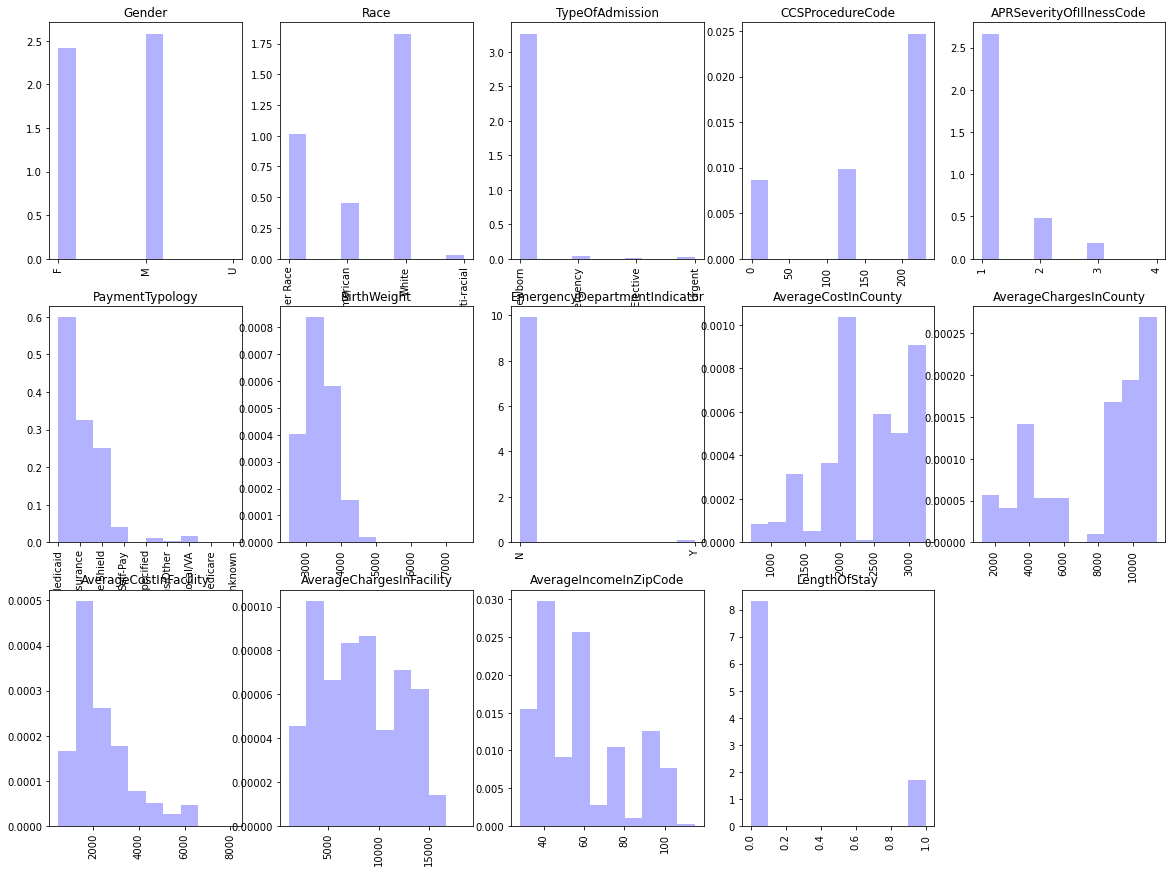

In [13]:
plt.figure(figsize=(20,20))
for i, col in enumerate(health_data_frame.columns):
    plt.subplot(4,5,i+1)
    plt.hist(health_data_frame[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Gender does not influenced that much as male and female has similar pattern. 



In our dataset we have categorical datas present so we have to convert categorical data into numerical data before spliting a data set.
Here the first things I found is that CCSProcedureCode attributes is a categorical datas and setting that attributes type as an object for encoding.

In [14]:
health_data_frame['CCSProcedureCode'] = health_data_frame['CCSProcedureCode'].astype('object')
health_data_frame_test['CCSProcedureCode'] = health_data_frame_test['CCSProcedureCode'].astype('object')

Let's convert all the categorical datas to numerical using One hot encoding.
One Hot Encoding method convert categorical data attributes to numerical by making new attributes with the values of that attributes and set values either 0 or 1. This means if the category present on that value that assign 1 else 0 and create a new dataframe with new attributes.

# One Hot Encoding
Importing OneHotEncoder and creating a method that OneHotEncode, converts all the attributes of type object(categorical) to numerical.

In [15]:
# health_data_frame = pd.get_dummies(health_data_frame)
# health_data_frame_test = pd.get_dummies(health_data_frame_test)
from sklearn.preprocessing import OneHotEncoder

for col in health_data_frame.columns:
    if health_data_frame[col].dtype == object:
        #encoding with PaymentTypology train set
        oneHotE = OneHotEncoder(handle_unknown='ignore')
        oneHotE.fit(health_data_frame[[col]])
        onehot_ = oneHotE.transform(health_data_frame[[col]]).toarray()
        onehot_test = oneHotE.transform(health_data_frame_test[[col]]).toarray()
        for i in range(len(oneHotE.categories_[0])):
            health_data_frame[col + '_' + str(oneHotE.categories_[0][i])] = onehot_[:,i]
            health_data_frame_test[col + '_' + str(oneHotE.categories_[0][i])] = onehot_test[:,i]

        health_data_frame = health_data_frame.drop([col], axis=1)
        health_data_frame_test = health_data_frame_test.drop([col],axis = 1)
health_data_frame.head()

APRSeverityOfIllnessCode  BirthWeight  AverageCostInCounty  \
0                         1         3700                 2611   
1                         1         2900                 3242   
2                         1         3200                 3155   
3                         1         3300                 3155   
4                         1         2600                 2611   

   AverageChargesInCounty  AverageCostInFacility  AverageChargesInFacility  \
0                    9227                   1751                      8951   
1                    8966                   3338                      6409   
2                   11381                   4980                      9323   
3                   11381                   5826                     15680   
4                    9227                   6000                     14344   

   AverageIncomeInZipCode  LengthOfStay  Gender_F  Gender_M  ...  \
0                      45             0       1.0       0.0  ...   
1                      34             0       0.0       1.0  ...   
2                      45             0       0.0       1.0  ...   
3                      59             0       1.0       0.0  ...   
4                      59             0       1.0       0.0  ...   

   PaymentTypology_Federal/State/Local/VA  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   PaymentTypology_Managed Care, Unspecified  PaymentTypology_Medicaid  \
0                                        0.0                       1.0   
1                                        0.0                       1.0   
2                                        0.0                       0.0   
3                                        0.0                       0.0   
4                                        0.0                       1.0   

   PaymentTypology_Medicare  PaymentTypology_Miscellaneous/Other  \
0                       0.0                                  0.0   
1                       0.0                                  0.0   
2                       0.0                                  0.0   
3                       0.0                                  0.0   
4                       0.0                                  0.0   

   PaymentTypology_Private Health Insurance  PaymentTypology_Self-Pay  \
0                                       0.0                       0.0   
1                                       0.0                       0.0   
2                                       1.0                       0.0   
3                                       1.0                       0.0   
4                                       0.0                       0.0   

   PaymentTypology_Unknown  EmergencyDepartmentIndicator_N  \
0                      0.0                             1.0   
1                      0.0                             1.0   
2                      0.0                             1.0   
3                      0.0                             1.0   
4                      0.0                             1.0   

   EmergencyDepartmentIndicator_Y  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 37 columns]

To test the train and testing set fitting result, I would like to use the F1-score method and here is the defination of the method.

# F1-Score Calculations Method
This is method to calculate a F1 -score value to measure the performance of our model.

In [16]:
from sklearn.metrics import f1_score

def get_f1_scores(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1



# Splitting a train set into train and validation

After encoding the train set data,
Next step is splitting the given train set into train and validation set using train_test_split method provided by sklearn library. Here I am spliting original train set data into 80% (train data frame) and 20%(validation data frame).


In [17]:
from sklearn.model_selection import train_test_split

X = health_data_frame.drop(columns = ['LengthOfStay'],axis=1)
y = health_data_frame['LengthOfStay']

train_X,val_X,train_y,val_y = train_test_split(X,y, test_size=0.25, shuffle=True,random_state = 0)


# Selecting a model


Since there is no direct(linear) relationship between two attributes so that the linear regression model is not the best method to test in our data set. So, for the non linear distribution of attributes we have diffent Machine learning model. I have selected the following ML technique predict the target value, 
1. Logistic Regression 
2. Decision Tree
3. Random Forest


In [18]:
X_train = train_X.copy()
X_val = val_X.copy()

y_train = train_y.copy()
y_val = val_y.copy()

# Logistic Regression


The logistic regression is justified because the EDA shows that the non linear relationship between the attributes. We applied regularization for tuning our lamdas value to minimize the gap between the train and validation performance.



In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly.fit(train_X)
train_X = poly.transform(train_X)
#test_X = poly.transform(test_X)
val_X = poly.transform(val_X)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
#test_X = scaler.transform(test_X)



In [21]:
print(train_X.shape)
print(val_X.shape)
#print(test_X.shape)



(44974, 9139)
(14992, 9139)


In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, 
                         class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X, train_y,val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))


/Users/purushottampadhya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train F1-Score score: 0.624
Validation F1-Score score: 0.621


The result shows that we have train score and test score. But the gap between the train and test score are high , to minimize the gap between those score I applied regularization technique with suitable lamdas value.

There is a gap between the train score and validation score, to minimize the gap let's apply regularization technique, 



## Apply regularisation
When applying regularisation we need to select the lambda value. For this I am selecting grid search method to tune the hyperparamet
er.

In [23]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)

# Then search
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, 
                             class_weight='balanced').fit(train_X, train_y.ravel())
    
    train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
    train_performace.append(train_f1)
    valid_performace.append(val_f1)
    

/Users/purushottampadhya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/purushottampadhya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

After tuning the parameter with lamdas, let's plot the result in a graph for vissualization



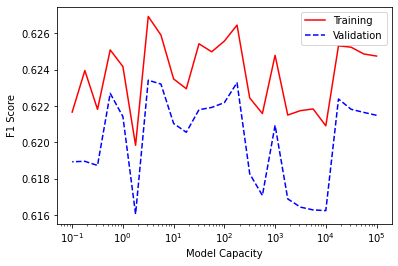

In [24]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()



The best lamdas value among I have tested as above and which shows the better performance on my output result. From above I got an lamdas value of 1/1000 which would 


In [27]:
clf = LogisticRegression(penalty='l2', C = 1/100, random_state=0,  
                         class_weight='balanced').fit(train_X, train_y.ravel())

train_f1, val_f1 = get_f1_scores(clf, train_X, train_y, val_X, val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

/Users/purushottampadhya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train F1-Score score: 0.616
Validation F1-Score score: 0.618


After logistic regression the updated F1-score minimize the gap between the train and validation score. Though the gap is minimized but the perfomance is not improved.
Let's try with the another model, Decision tree.

# Decision Tree



In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight = 'balanced',random_state = 0)
clf.fit(train_X,train_y)



DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = clf.predict(val_X)
print('report:',classification_report(val_y,y_pred))



report:               precision    recall  f1-score   support

           0       0.86      0.81      0.84     12424
           1       0.29      0.36      0.32      2568

    accuracy                           0.74     14992
   macro avg       0.57      0.59      0.58     14992
weighted avg       0.76      0.74      0.75     14992



In [30]:
train_f1,val_f1 = get_f1_scores(clf,train_X,train_y,val_X,val_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))


Train F1-Score score: 0.887
Validation F1-Score score: 0.578


Since the F1 score value from decision tree gives overfitting result with high gap between the train score and validation score. Also the F1-score value from Decision tree is less than Logistic Regression.
Decision tree always make a same tree structure due to which the result might be poor. To optimize the result from decision tree, I choosed Random Forest Model, which gives randomness on the tree structure would provide better score.



# Random Forest

In [31]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier( class_weight='balanced_subsample', random_state=0)
clf.fit(X_train, y_train)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [32]:
train_f1, val_f1 = get_f1_scores(clf, X_train, y_train,X_val, y_val)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.904
Validation F1-Score score: 0.593


Though the validation score is low in compare to other model but train score has better performance. The gap between the train and validation score is high to minimize the gap I am doing hyperparameter tuning with different parameter in grid search.

I have used following parameters for hyperparameter tuning, 

>max_depth: this parameter provides the maximum depth of the tree

>min_samples_split: this is the minimum number of samples required to split in the internal node.

>min_samples_leaf: this is the minimum numbers of samples on the leaf nodes on the each left and right node of the tree 

In [33]:

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(5,20, 2.5), 'min_samples_split':np.arange(2,15,4), 'min_samples_leaf': np.arange(0, 10, 2)}

dt_clf = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample')
Gridclf = GridSearchCV(dt_clf, parameters, scoring='f1_macro')
Gridclf.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              criterion='entropy'),
             param_grid={'max_depth': array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5]),
                         'min_samples_leaf': array([0, 2, 4, 6, 8]),
                         'min_samples_split': array([ 2,  6, 10, 14])},
             scoring='f1_macro')

In [34]:
pd.DataFrame(Gridclf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.042443      0.012593         0.000000        0.000000   
1         0.035642      0.000157         0.000000        0.000000   
2         0.035577      0.000052         0.000000        0.000000   
3         0.035865      0.000808         0.000000        0.000000   
4         1.511319      0.047886         0.044974        0.001462   
..             ...           ...              ...             ...   
115       2.357582      0.016557         0.102863        0.000857   
116       2.329911      0.016443         0.100151        0.000466   
117       2.392518      0.046838         0.100439        0.000990   
118       2.337017      0.006117         0.100736        0.001030   
119       2.386722      0.121617         0.100279        0.001146   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
0                 5                      0                       2   
1                 5                      0                       6   
2                 5                      0                      10   
3                 5                      0                      14   
4                 5                      2                       2   
..              ...                    ...                     ...   
115            17.5                      6                      14   
116            17.5                      8                       2   
117            17.5                      8                       6   
118            17.5                      8                      10   
119            17.5                      8                      14   

                                                params  split0_test_score  \
0    {'max_depth': 5.0, 'min_samples_leaf': 0, 'min...                NaN   
1    {'max_depth': 5.0, 'min_samples_leaf': 0, 'min...                NaN   
2    {'max_depth': 5.0, 'min_samples_leaf': 0, 'min...                NaN   
3    {'max_depth': 5.0, 'min_samples_leaf': 0, 'min...                NaN   
4    {'max_depth': 5.0, 'min_samples_leaf': 2, 'min...           0.599427   
..                                                 ...                ...   
115  {'max_depth': 17.5, 'min_samples_leaf': 6, 'mi...           0.652196   
116  {'max_depth': 17.5, 'min_samples_leaf': 8, 'mi...           0.649768   
117  {'max_depth': 17.5, 'min_samples_leaf': 8, 'mi...           0.652347   
118  {'max_depth': 17.5, 'min_samples_leaf': 8, 'mi...           0.654170   
119  {'max_depth': 17.5, 'min_samples_leaf': 8, 'mi...           0.651638   

     split1_test_score  split2_test_score  split3_test_score  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4             0.605674           0.617546           0.608179   
..                 ...                ...                ...   
115           0.648580           0.640520           0.639412   
116           0.646234           0.638490           0.635185   
117           0.645986           0.639667           0.637019   
118           0.645523           0.642644           0.639428   
119           0.645059           0.637018           0.637399   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0                  NaN              NaN             NaN              120  
1                  NaN              NaN             NaN              100  
2                  NaN              NaN             NaN               98  
3                  NaN              NaN             NaN               97  
4             0.603433         0.606852        0.006072               83  
..                 ...              ...             ...              ...  
115           0.651475         0.646437        0.005431               20  
116           0.649307         0.643797  

In [35]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

clf = Gridclf.best_estimator_

0.6504159601513624
{'max_depth': 17.5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [36]:
train_f1, val_f1 = get_f1_scores(clf, X_train, y_train,X_val, y_val)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

Train F1-Score score: 0.714
Validation F1-Score score: 0.657



In comparing the result of F1 score from three different model ,it is concluded that Random Forest gives better result.

After doing hyperparameter, using grid search I have found improved performance of the score but still results gap between the validation and train sets, which was tuned manually by changing some hyperparameter manually to 

parameters = {'max_depth':np.arange(5,20, 2.5), 'min_samples_split':np.arange(2,15,4), 'min_samples_leaf': np.arange(0, 10, 2)}



Visualizing result in a graph plot



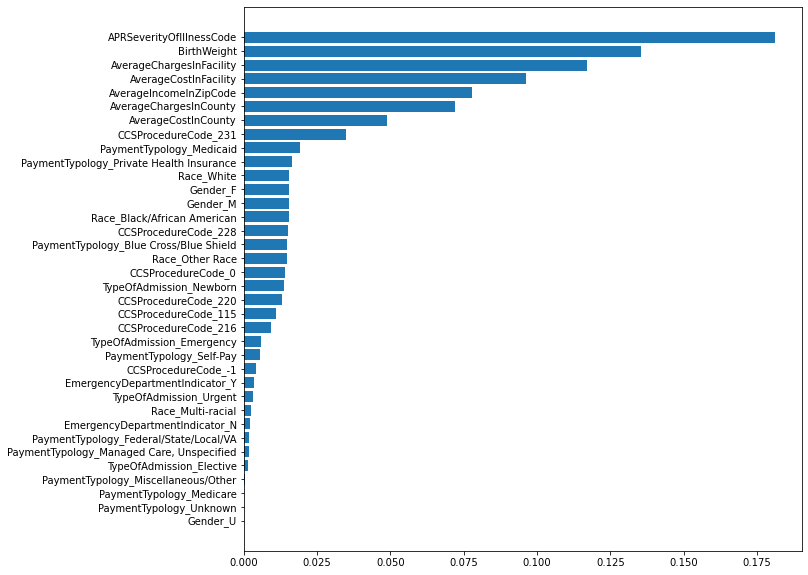

In [38]:
tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()

plt.figure(figsize=(10,10))
plt.barh(X.columns[sorted_idx], tree_feature_importances[sorted_idx])
plt.show()

This graph shows that high value attributes, APRSeverityOfflinessCode, BirthWeight and AverageChargesInFacility are the top 3 factors to determine the numberOfDays to stay in hospital for the patient where as the bottom low value or almost none value attributes Gender, PaymentTypology does not affect our target varibale.




## Testing the hypothesis

From above result, I have assumed that I reached the best performance that I can achieve. 
The next step is to test the hypothesis, that I have developed and look how trustworthy the model that I developed to generalise the unseen data.




In [40]:
from sklearn.metrics import classification_report

test_pred = clf.predict(X_val)
    
print(classification_report(y_val, test_pred,))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     12424
           1       0.38      0.62      0.47      2568

    accuracy                           0.76     14992
   macro avg       0.64      0.70      0.66     14992
weighted avg       0.82      0.76      0.78     14992



# Confusion matrix plot

Then after plot the confusion matrix to see the result of our perfomance


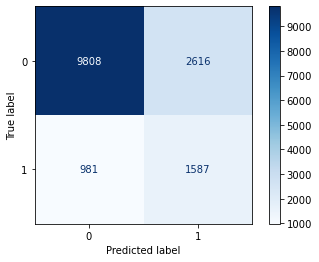

In [42]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_val, y_val,
                                 cmap=plt.cm.Blues)


Confusion matrix concludes that for both classes the majority of the results provides higher precision of prediction. 


# Prediction Unseen Data

In [43]:

test_prediction = clf.predict(health_data_frame_test)

In [45]:
s3847501_predictions = pd.read_csv('s3847501_predictions.csv')

In [47]:
s3847501_predictions.head()
s3847501_predictions['LengthOfStay'] = test_prediction

In [48]:
s3847501_predictions.head()

ID  LengthOfStay
0   1             1
1   2             0
2   3             1
3   4             0
4   5             0

In [49]:
s3847501_predictions.to_csv('s3847501_predictions.csv', index = False)


# Conclusion 

To meet our object of this assignment, I have selected three different model Logistic Regression, Decision tree and Random forest as the distribution of data is non linear. Among the three different model I have tested, Random forest provide the better performance on F1-score, 
Train F1-Score score: 0.714
Validation F1-Score score: 0.657

and using that model, I have predicted LengthOfStay (Target Variable)of patient in hospital in two classes 1(lengthOfStay < 4 and) and 0 (lengthOfStay >=4).



